<a href="https://colab.research.google.com/github/iMan0405/artificial_intelligence/blob/master/DT_vs_AI_Loyiha_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPU ni sozlanganligini tekshirish

In [ ]:
import torch
torch.cuda.is_available()

True

# fastai==2.5.3 versiyasini o'rnatish

In [ ]:
!pip install fastai==2.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 6.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of fastai to determine which version is compatible with other requirements. This could take a while.
ERROR: Could not find a version that satisfies the requirement torch<1.11,>=1.7.0 (from fastai) (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1)
ERROR: No matching distribution found for torch<1.11,>=1.7.0


# kerakli kutubxonalarni chaqirish

In [ ]:
import fastai

# torch va fastai kutubxonalari versiyalarini tekshirish

In [ ]:
print(f"torch versiyasi: {torch.__version__}")
print(f"fastai versiyasi: {fastai.__version__}")

torch versiyasi: 2.0.1+cu118
fastai versiyasi: 2.7.12


# OIDv4_toolkit ni yuklab olish

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 5.83 MiB/s, done.
Resolving deltas: 100% (146/146), done.


## kerakli kutubxonlarni o'rnatib olamiz

In [ ]:
!cd OIDv4_ToolKit/ && pip install -r requirements.txt

## datasetdagi main.py fayli parametrlarini ko'ramiz

In [ ]:
!cd OIDv4_ToolKit/ && python main.py -h

## Datasetdan kerakli class larni yuklab olish

In [ ]:
!cd OIDv4_ToolKit/ && python3 main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 200


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Car.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...145%, 0 MB, 41144 KB/s, 0 seconds passed
[DOWNLOAD] | File clas

# Model quramiz

###Kutubxonalarni yuklab olamiz

In [ ]:
from fastai.vision.all import *
from ipywidgets import widgets

### path o'zgaruvchi yaratib datasetimizni saqlab olamiz

In [ ]:
#path
path = Path('train')
path.ls()
fls = get_image_files(path)
fls

(#600) [Path('train/Car/204a71cd5d449f7c.jpg'),Path('train/Car/57aaede3dbd01f3a.jpg'),Path('train/Car/78a6b7eb82a34a1a.jpg'),Path('train/Car/41db56354cd4cdae.jpg'),Path('train/Car/75627c98340a0bf0.jpg'),Path('train/Car/bdcbb306decf35de.jpg'),Path('train/Car/9ae83579fe2b3f7c.jpg'),Path('train/Car/b2eb11975c2fec4b.jpg'),Path('train/Car/c32ffa35b6813e3d.jpg'),Path('train/Car/6bbc96199f423a0c.jpg')...]

### yuklab olingan file larda xatoli bor yo'qligini tkshiramiz

In [ ]:
failed = verify_images(path)
failed

'PosixPath' object is not iterable


(#0) []

### data loader yaratib olamiz

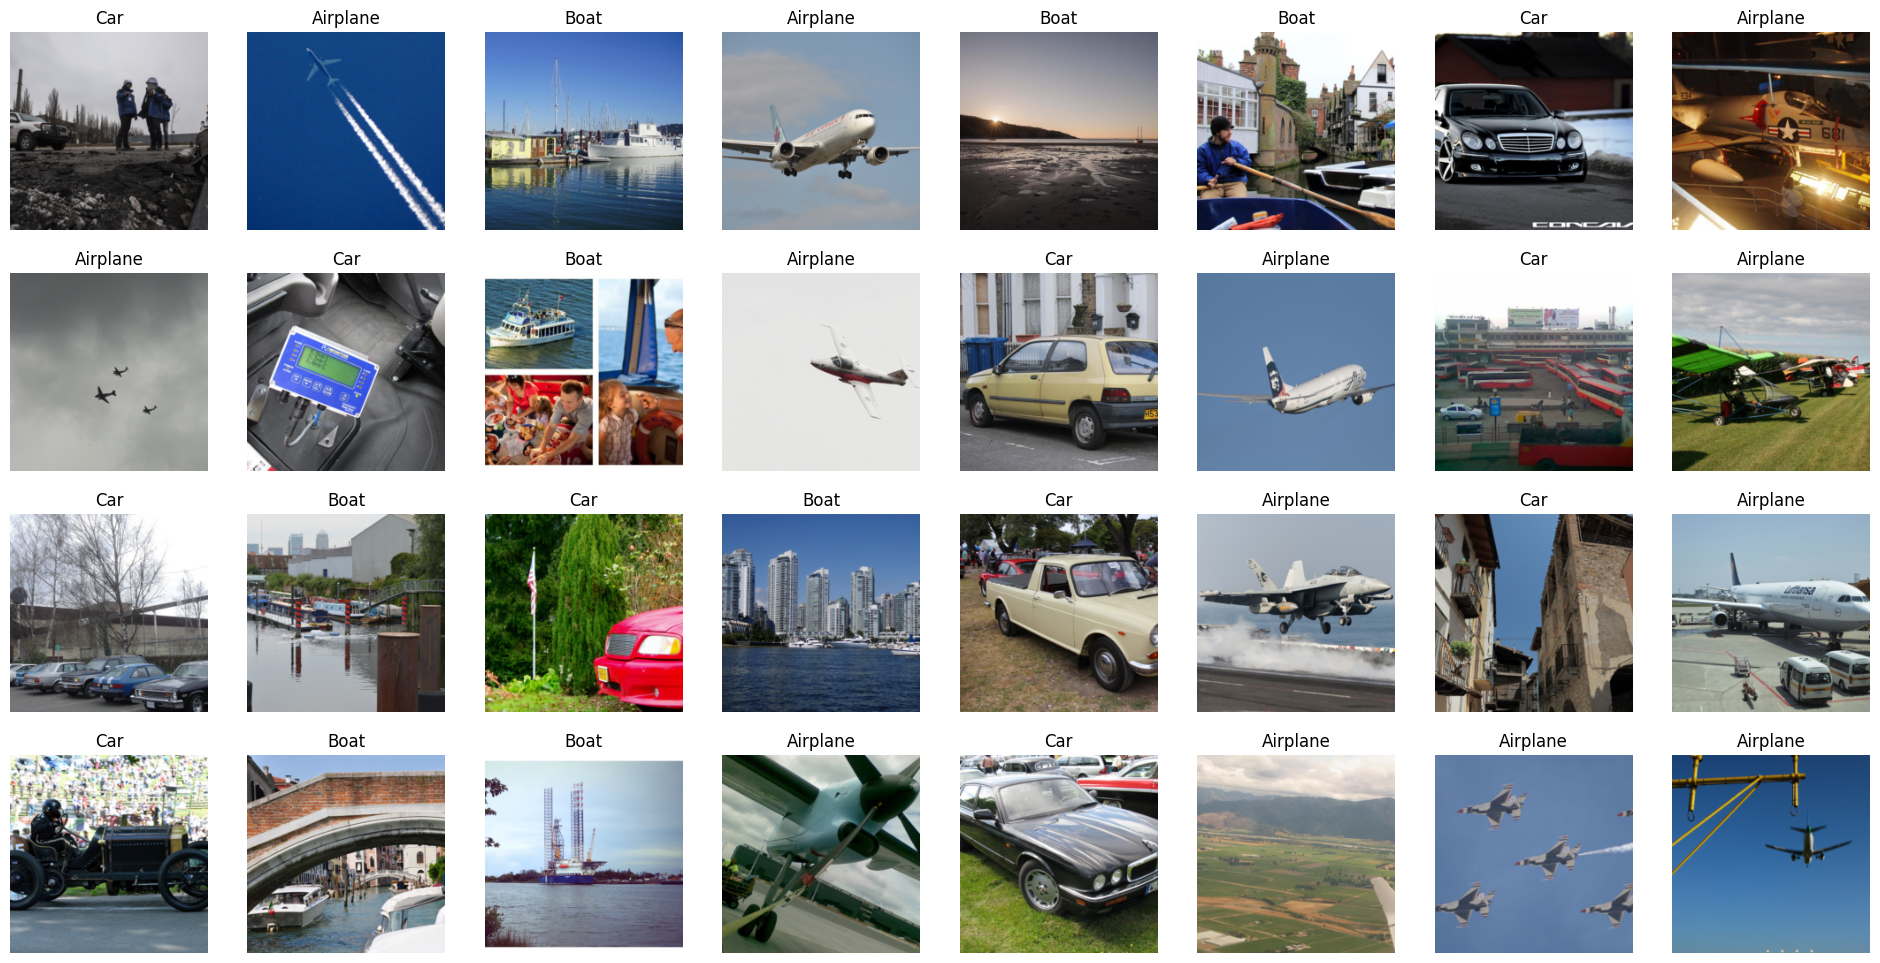

In [ ]:
#DataBlock yaratamiz

transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

#Dataloader yaratamiz

dls = transports.dataloaders(path)

#Datasetni tekshirish

dls.train.show_batch(max_n=32, nrows=4)

# ML

In [ ]:
#Train

learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

### Xatoliklarni tekshirish

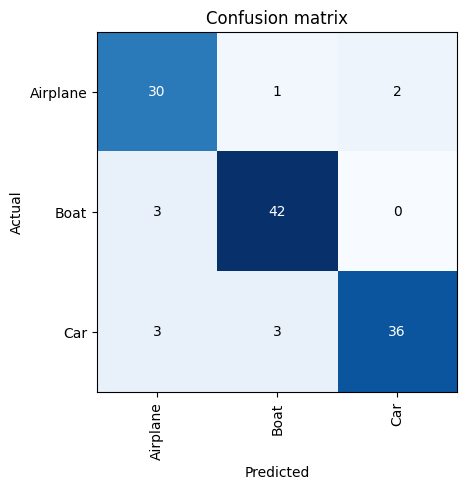

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

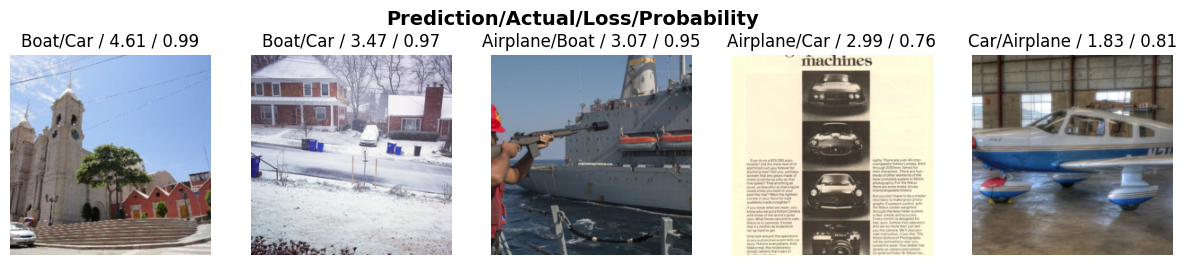

In [ ]:
interp.plot_top_losses(5, nrows=1)

# Modelni mustaqil tekshirib ko'ramiz

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

bashorat: Airplane
aniqlilik darajasi: 99.9%


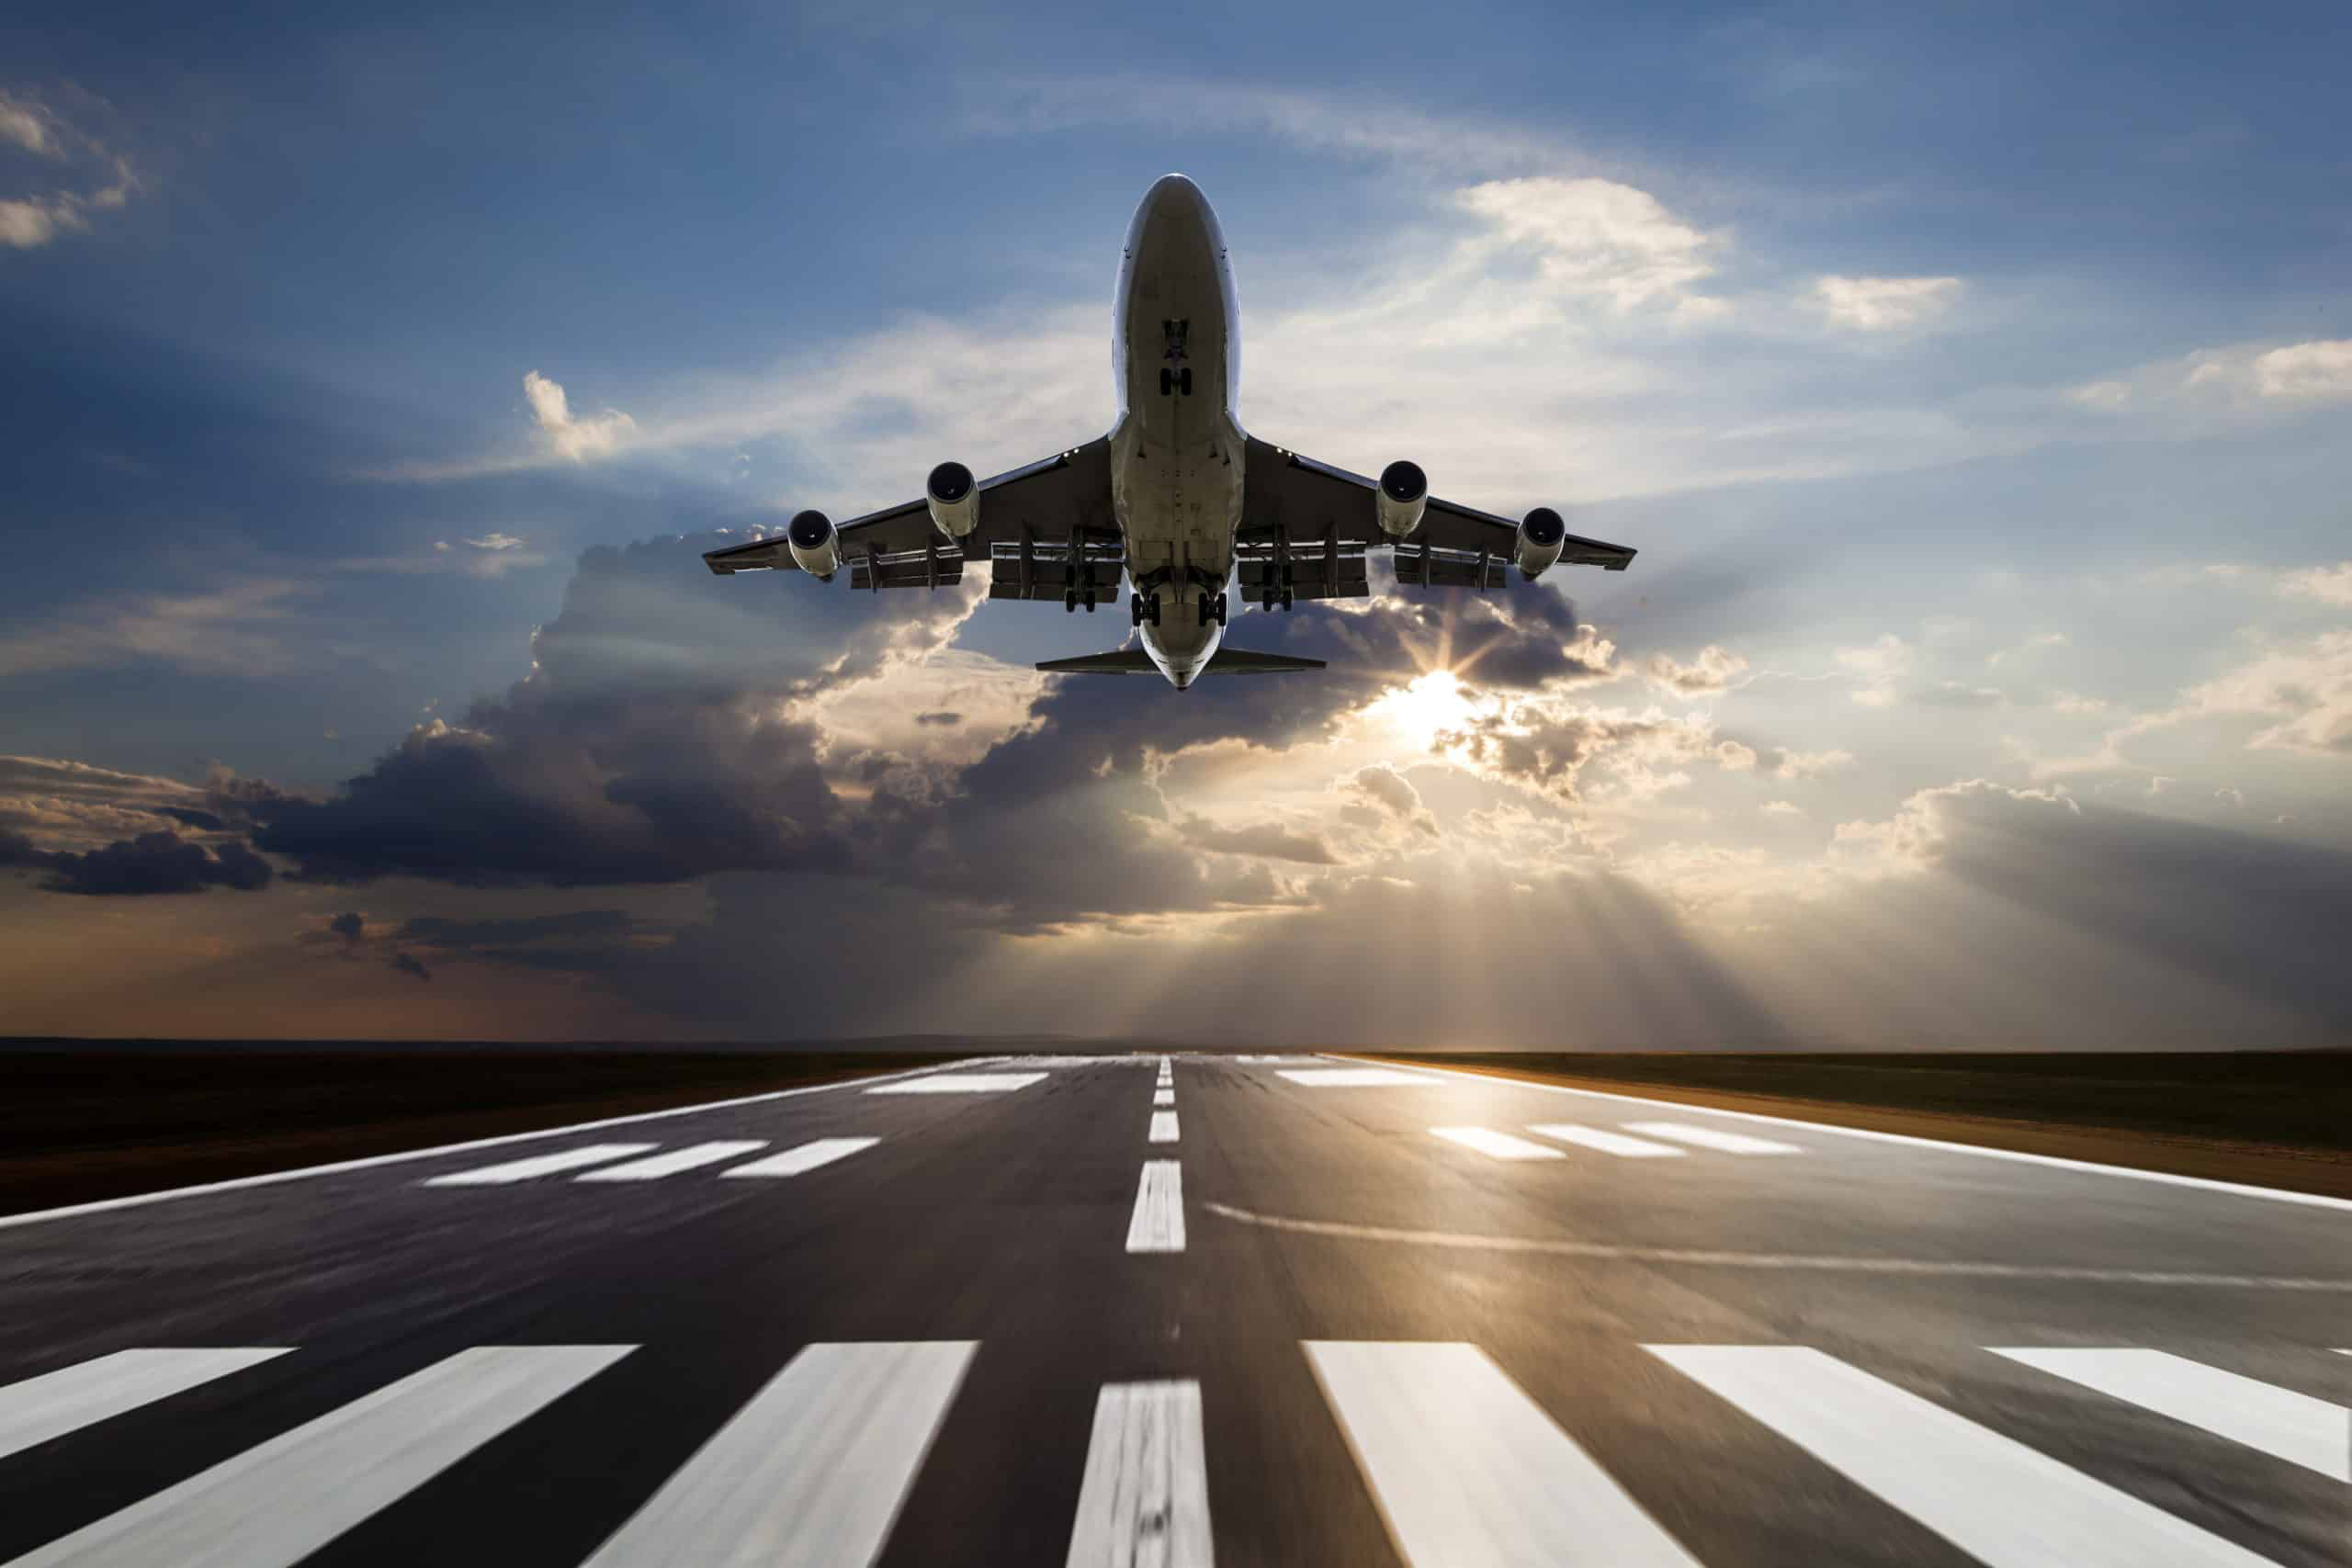

In [ ]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"bashorat: {pred}")
print(f"aniqlilik darajasi: {probs[pred_id]*100:.1f}%")
img